In [14]:
# Importing required libraries

import numpy as np
import scipy.stats as ss
from numpy.random import default_rng
import matplotlib.pyplot as plt 
import math
import random
import sympy as sy
import matplotlib as mpl
import pickle as pk
from matplotlib import colors
from sympy import solve, Poly, Eq, Function, exp
import warnings
warnings.filterwarnings("ignore")

In [3]:
# A.1.
np.random.seed(42)
def GetData(m,c,points):
  """
  m : mean of datapoints
  c : covariance of datapoints
  points : no. of points
  """

  D1 , D2 = np.random.multivariate_normal(mean = m, cov = c , size = points).T
  W = np.vstack((D1,D2)).T
  return W 

  
m1 = [0, 0]
c1 = [[1, 0], [0, 1]]

m2 = [1.5, 1.5]
c2 = [[0.8, 0], [0, 0.8]]

points = 100

# W1 = GetData(m1,c1,points)
# W2 = GetData(m2,c2,points)


In [4]:
# Saving data

path = '/content/drive/MyDrive/Projects/SML_Assignment/Assignment_2/Saved_Data/'
# pk.dump(W1, open(path+'Q1W1.pkl', "wb"))
# pk.dump(W2, open(path+'Q1W2.pkl', "wb"))

W1 = pk.load(open(path+'Q1W1.pkl', "rb"))
W2 = pk.load(open(path+'Q1W2.pkl', "rb"))

print('Shape of Data of Class 1: ',W1.shape)
print('Shape of Data of Class 2: ',W2.shape)
print()
print('Few samples from Class 1: ')
print(W1[:5])
print()
print('Few samples from Class 2: ')
print(W2[:5])

Shape of Data of Class 1:  (100, 2)
Shape of Data of Class 2:  (100, 2)

Few samples from Class 1: 
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]

Few samples from Class 2: 
[[1.82001474 2.00158093]
 [2.46871048 2.44254921]
 [0.26777506 0.66118378]
 [1.96066155 1.95954412]
 [1.96067266 4.9459878 ]]


In [5]:
# A.2.

# Splitting the data into train , test based on ration
def DataSplit(Data,ratio):
  np.random.seed(42)
  trainind = random.sample(range(0,len(Data)),k = int(ratio*Data.shape[0]))
  testind = [i for i in range(100) if i not in trainind]
  Train = Data[trainind]
  Test = Data[testind]
  return Train, Test

def Mean_Covariance(Data):
  m = np.mean(Data,axis=0)
  Data = Data - m
  S = (1/Data.shape[0])*np.dot(Data.T,Data)
  return m,S



In [6]:
# Sampling 50 datapoints from both the class 1

#TrainW1 , TestW1 = DataSplit(W1,0.5)

path = '/content/drive/MyDrive/Projects/SML_Assignment/Assignment_2/Saved_Data/'
# pk.dump(TrainW1, open(path+'Q1TrainW1.pkl', "wb"))
# pk.dump(TestW1, open(path+'Q1TestW1.pkl', "wb"))

TrainW1 = pk.load(open(path+'Q1TrainW1.pkl', "rb"))
TestW1 = pk.load(open(path+'Q1TestW1.pkl', "rb"))

# Sampling 50 datapoints from both the class 2

#TrainW2 , TestW2 = DataSplit(W2,0.5)

path = '/content/drive/MyDrive/Projects/SML_Assignment/Assignment_2/Saved_Data/'
# pk.dump(TrainW2, open(path+'Q1TrainW2.pkl', "wb"))
# pk.dump(TestW2, open(path+'Q1TestW2.pkl', "wb"))

TrainW2 = pk.load(open(path+'Q1TrainW2.pkl', "rb"))
TestW2 = pk.load(open(path+'Q1TestW2.pkl', "rb"))


In [7]:

print('Division for Class 1 ')
print('\t Training Data Shape : ',TrainW1.shape)
print('\t Testing Data Shape : ',TestW1.shape)

mW1 , SW1 = Mean_Covariance(np.copy(TrainW1))
print('\nMean of training data points in class 1 ')
print(mW1,'\n')
print('Covariance Matrix of training data points in class 1 ')
print(SW1,'\n')

Division for Class 1 
	 Training Data Shape :  (50, 2)
	 Testing Data Shape :  (50, 2)

Mean of training data points in class 1 
[-0.06746687  0.17938893] 

Covariance Matrix of training data points in class 1 
[[0.70188304 0.0140053 ]
 [0.0140053  1.0775313 ]] 



In [8]:
# A.3.

print('Division for Class 2 ')
print('\t Training Data Shape : ',TrainW2.shape)
print('\t Testing Data Shape : ',TestW2.shape)

mW2 , SW2 = Mean_Covariance(np.copy(TrainW2))
print('\nMean of training data points in class 2 ')
print(mW2,'\n')
print('Covariance Matrix of training data points in class 2 ')
print(SW2,'\n')

Division for Class 2 
	 Training Data Shape :  (50, 2)
	 Testing Data Shape :  (50, 2)

Mean of training data points in class 2 
[1.47725779 1.48171068] 

Covariance Matrix of training data points in class 2 
[[0.99918832 0.01212503]
 [0.01212503 0.6215981 ]] 



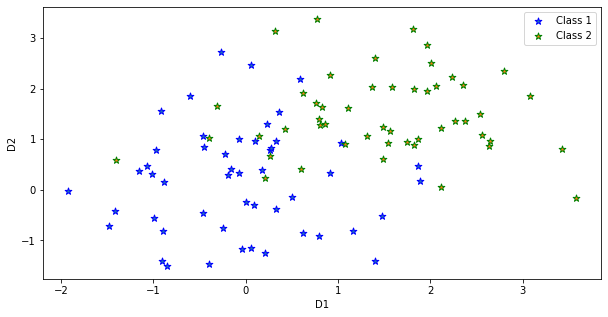

In [9]:
# A.4.

def Plot(Data1,Data2): 
  plt.figure(figsize=(10,5))
  plt.scatter(Data1[:,0], Data1[:,1], label='Class 1' , marker ="*",  edgecolor ="blue",  s = 50) 
  plt.scatter(Data2[:,0], Data2[:,1], label='Class 2' , marker ="*",  edgecolor ="green",  s = 50)  
  plt.xlabel('D1')
  plt.ylabel('D2')
  plt.legend()
  plt.show() 

Plot(TrainW1,TrainW2) 


In [10]:
# A.5.

X_train = np.vstack((TrainW1,TrainW2))
X_test = np.vstack((TestW1,TestW2))
Y_train = np.hstack((np.zeros(TrainW1.shape[0]),np.ones(TrainW2.shape[0])))
Y_test = np.hstack((np.zeros(TestW1.shape[0]),np.ones(TestW2.shape[0])))

def Discriminant_Function(Data,m1,S1,m2,S2):
  """ 
  Data : Testing datapoints
  m1 :  Mean of class 1 training datapoints
  m2 :  Mean of class 2 training datapoints
  S1 :  Covariance of class 1 training datapoints
  S2 :  Covariance of class 2 training datapoints
  """
  S1inv = np.linalg.inv(S1)
  S2inv = np.linalg.inv(S2)
  S1det = np.linalg.det(S1)
  S2det = np.linalg.det(S2)
  Pw1 = 0.5
  Pw2 = 0.5
  gc = []
  for i in range(Data.shape[0]):

    # For class 1 , discrimiant value is :
    gc1 = np.dot(np.dot(Data[i],-0.5*S1inv),Data[i])
    gc1 = gc1 + np.dot(np.dot(S1inv,m1),Data[i])
    gc1 = gc1 + (-0.5*np.dot(np.dot(m1.T,S1inv),m1)) - 0.5*math.log(S1det) + math.log(Pw1)

    # For class 2 , discrimiant value is :
    gc2 = np.dot(np.dot(Data[i],-0.5*S2inv),Data[i])
    gc2 = gc2 + np.dot(np.dot(S2inv,m2),Data[i])
    gc2 = gc2 + (-0.5*np.dot(np.dot(m2.T,S2inv),m2)) - 0.5*math.log(S2det) + math.log(Pw2)

    t = [gc1 , gc2]
    gc.append(t.index(max(t)))

  return gc

     

Y_pred = Discriminant_Function(X_test,mW1,SW1,mW2,SW2)  
print('Predicted Labels on Test Dataset : ')
print(Y_pred)


Predicted Labels on Test Dataset : 
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
# A.6.

def GetAccuracy(actual,predicted):
    
  c = 0
  for i in range(len(actual)):
      if(actual[i]!=predicted[i]):
          continue
      else:    
          c = c + 1
  return c/len(actual)

def CorrectClassified(actual,predicted,cl):
  
  c = 0
  t = 0
  for i in range(len(actual)):
    if actual[i]== cl :
      t = t + 1
      if actual[i]==predicted[i]:
        c = c+ 1

  return t,c 

print('Accuracy on Test Dataset : ',GetAccuracy(list(Y_test),Y_pred)*100,'%')
t1 , c1 = CorrectClassified(list(Y_test),Y_pred,cl=0)
t2 , c2 = CorrectClassified(list(Y_test),Y_pred,cl=1)
print('For class 1 :Number of correctly classified point out of ',t1,' are : ',c1)
print('For class 2 :Number of correctly classified point out of ',t2,' are : ',c2)

Accuracy on Test Dataset :  95.0 %
For class 1 :Number of correctly classified point out of  50  are :  45
For class 2 :Number of correctly classified point out of  50  are :  50


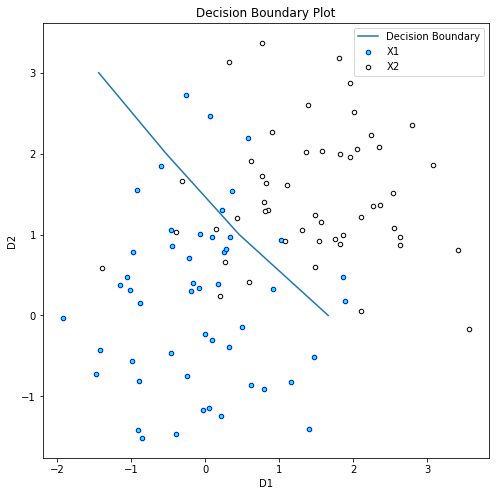

In [15]:
# A.7.

def Plot_DB(X_train,m1,S1,m2,S2):
  
  plt.figure(figsize=(8,8))
  S1inv = np.linalg.inv(S1)
  S2inv = np.linalg.inv(S2)
  S1det = np.linalg.det(S1)
  S2det = np.linalg.det(S2)
  Pw1 = 0.5
  Pw2 = 0.5
  gc = []
  Z = []

  X1 = -0.5*S1inv
  Y1 = np.dot(S1inv,m1)
  Z1 = (-0.5*np.dot(np.dot(m1.T,S1inv),m1)) - 0.5*math.log(S1det) + math.log(Pw1)

  X2 = -0.5*S2inv
  Y2 = np.dot(S2inv,m2)
  Z2 = (-0.5*np.dot(np.dot(m2.T,S2inv),m2)) - 0.5*math.log(S2det) + math.log(Pw2)

  D1=sy.Symbol('D1')
  D2=sy.Symbol('D2')
  Equation = ((X1[0][0]*D1**2) + X1[0][1]*D1*D2 + X1[1][0]*D1*D2 + (X1[1][1]*D2**2) + Y1[0]*D1 + Y1[1]*D2 + Z1 -\
              (X2[0][0]*D1**2) - X2[0][1]*D1*D2 - X2[1][0]*D1*D2 - (X2[1][1]*D2**2) - Y2[0]*D1 - Y2[1]*D2 - Z2) 

  solution = sy.solve(Equation, [D2])
  d2points = np.arange(-2,4)
  d1points = sy.lambdify(D1, solution,'numpy')(d2points)
  plt.plot(d1points[0],d2points, label="Decision Boundary")
  plt.xlabel("D1")
  plt.ylabel("D2")
  plt.title("Decision Boundary Plot")   
  plt.legend()
          

  plt.scatter(X_train[:50,0], X_train[:50,1], s = 20, c = 'Aqua', label = 'X1', edgecolor='Blue')           
  plt.scatter(X_train[50:,0], X_train[50:,1], s = 20 ,c = 'White', label = 'X2', edgecolor='Black')           
  plt.axis('tight')
  plt.xlabel('D1')
  plt.ylabel('D2')
  plt.legend()

Plot_DB(X_train, mW1,SW1,mW2,SW2)